Look Into The Datas

In [423]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dim_data = pd.read_csv('../EDA-Hospitality/datasets/dim_date.csv')
dim_hotels = pd.read_csv('../EDA-Hospitality/datasets/dim_hotels.csv')
dim_rooms = pd.read_csv('../EDA-Hospitality/datasets/dim_rooms.csv')
fact_agg_bookings = pd.read_csv('../EDA-Hospitality/datasets/fact_aggregated_bookings.csv')
fact_bookings = pd.read_csv('../EDA-Hospitality/datasets/fact_bookings.csv')
new_aug_data = pd.read_csv('../EDA-Hospitality/datasets/new_data_august.csv')

In [424]:
dim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [425]:
dim_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


In [426]:
dim_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


In [427]:
fact_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


In [428]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


In [429]:
new_aug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          7 non-null      int64  
 1   property_name        7 non-null      object 
 2   category             7 non-null      object 
 3   city                 7 non-null      object 
 4   room_category        7 non-null      object 
 5   room_class           7 non-null      object 
 6   check_in_date        7 non-null      object 
 7   mmm yy               7 non-null      object 
 8   week no              7 non-null      object 
 9   day_type             7 non-null      object 
 10  successful_bookings  7 non-null      int64  
 11  capacity             7 non-null      int64  
 12  occ%                 7 non-null      float64
dtypes: float64(1), int64(3), object(9)
memory usage: 860.0+ bytes


Let look more deep into fact_bookings dataset

In [430]:
fact_bookings.shape

(134590, 12)

so it has 134590 rows and 12 cols

In [431]:
fact_bookings.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

In [432]:
fact_bookings['room_category'].value_counts()

room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64

room category RT2 is booked most offen and here we have 4 different room type

In [433]:
fact_bookings['booking_platform'].value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

we are getting booking majorly from 3rd party website or app and very less traffic in offline booking and also direct online booking from company own website or app

<Axes: xlabel='booking_platform', ylabel='count'>

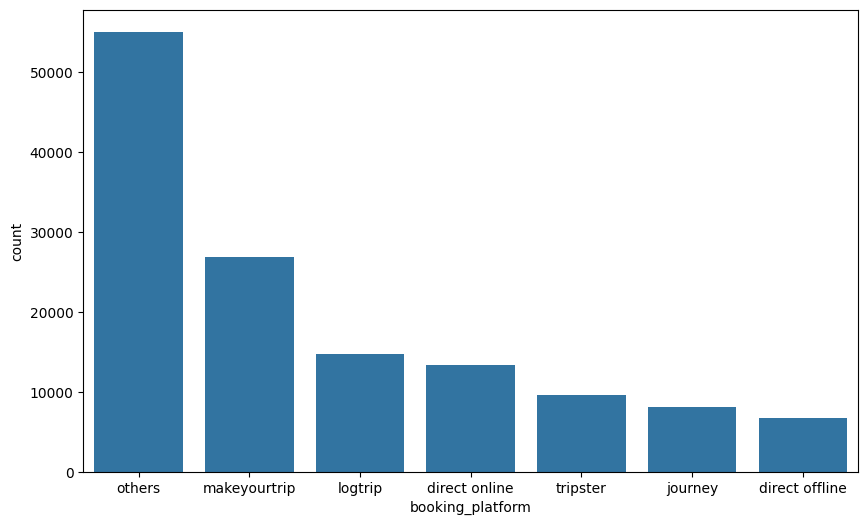

In [434]:
plt.figure(figsize=(10,6))
sns.barplot(fact_bookings['booking_platform'].value_counts())

In [435]:
fact_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [436]:
fact_bookings.describe().T

,count,mean,std,min,25%,50%,75%,max
property_id,134590.0,18061.113493,1093.055847,16558.0,17558.0,17564.0,18563.0,19563.0
no_guests,134587.0,2.036170,1.034885,-17.0,1.0,2.0,2.0,6.0
ratings_given,56683.0,3.619004,1.235009,1.0,3.0,4.0,5.0,5.0
revenue_generated,134590.0,15378.054127,93036.038671,6500.0,9900.0,13500.0,18000.0,28560000.0
revenue_realized,134590.0,12696.123256,6928.108124,2600.0,7600.0,11700.0,15300.0,45220.0


In [437]:
dim_hotels.shape

(25, 4)

In [438]:
dim_hotels.columns

Index(['property_id', 'property_name', 'category', 'city'], dtype='object')

In [439]:
dim_hotels['category'].value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

here we have total of 25 different hotels out of which 16 are of luxury type

In [440]:
dim_hotels['city'].value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

In [441]:
pivot_table = pd.pivot_table(dim_hotels,values='property_name',index=['city'],columns=['category'],aggfunc='count')
pivot_table

category,Business,Luxury
city,,
Bangalore,2,4
Delhi,2,3
Hyderabad,2,4
Mumbai,3,5


In [442]:
df_copy_hotels = dim_hotels.copy()
df_copy_hotels['count'] = 1
df_copy_hotels

,property_id,property_name,category,city,count
0,16558,Atliq Grands,Luxury,Delhi,1
1,16559,Atliq Exotica,Luxury,Mumbai,1
2,16560,Atliq City,Business,Delhi,1
3,16561,Atliq Blu,Luxury,Delhi,1
4,16562,Atliq Bay,Luxury,Delhi,1
5,16563,Atliq Palace,Business,Delhi,1
6,17558,Atliq Grands,Luxury,Mumbai,1
7,17559,Atliq Exotica,Luxury,Mumbai,1
8,17560,Atliq City,Business,Mumbai,1
9,17561,Atliq Blu,Luxury,Mumbai,1


<Axes: xlabel='city', ylabel='count'>

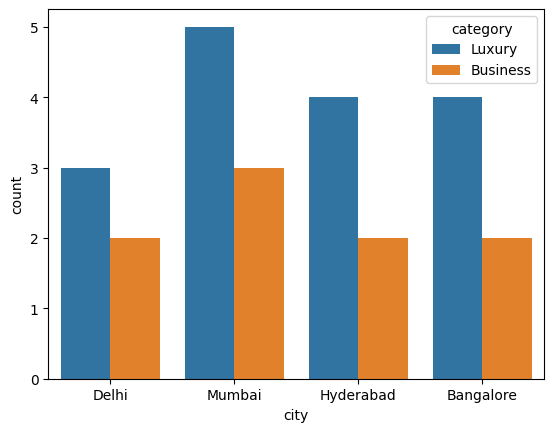

In [443]:
sns.barplot(df_copy_hotels,x='city',y='count',estimator='sum',hue='category')

In [444]:
# unique property ids in agg_bookings

print(f'unique list - {fact_agg_bookings["property_id"].unique()}')
print(f'unique Value count - {len(fact_agg_bookings["property_id"].unique())}')

unique list - [16559 19562 19563 17558 16558 17560 19558 19560 17561 16560 16561 16562
 16563 17559 17562 17563 18558 18559 18561 18562 18563 19559 19561 17564
 18560]
unique Value count - 25


In [445]:
# total booking per property_id

fact_agg_bookings['property_id'].value_counts()

property_id
16559    368
17559    368
17564    368
19561    368
19559    368
18563    368
18562    368
18561    368
18559    368
18558    368
17563    368
17562    368
16563    368
19562    368
16562    368
16561    368
16560    368
17561    368
19560    368
19558    368
17560    368
16558    368
17558    368
19563    368
18560    368
Name: count, dtype: int64

<Axes: xlabel='property_id', ylabel='successful_bookings'>

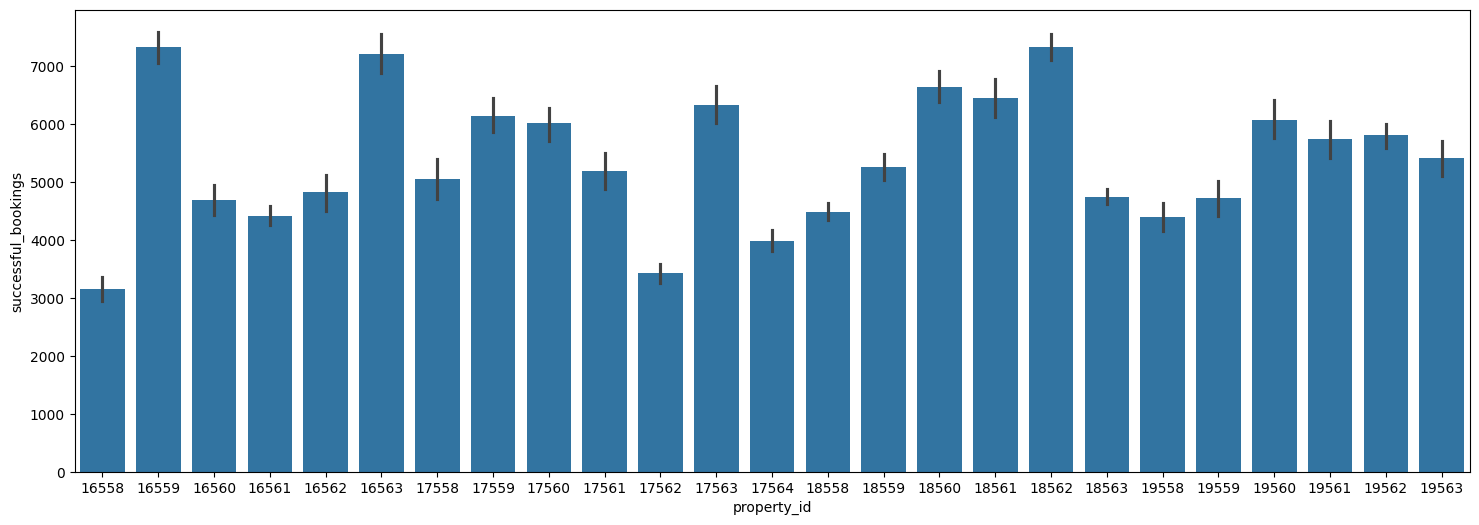

In [446]:
plt.figure(figsize=(18,6))
sns.barplot(fact_agg_bookings,x='property_id',y='successful_bookings',estimator='sum')

In [447]:
# days on which booking are greater then capacity

fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [448]:
df_capacity_booking = fact_agg_bookings.copy()
df_capacity_booking['morethencapacity'] = 'more' if df_capacity_booking['successful_bookings'] > df_capacity_booking['capacity'] else 'less'
df_capacity_booking.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

we are getting the error due to empty values in capacity

In [449]:
fact_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [450]:
df_capacity_booking = fact_agg_bookings[fact_agg_bookings['successful_bookings']>fact_agg_bookings['capacity']]
df_capacity_booking

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [451]:
# property that have highest capacity

fact_agg_bookings.sort_values('capacity',ascending=False)

,property_id,check_in_date,room_category,successful_bookings,capacity
3128,17558,1-Jun-22,RT2,19,50.0
2128,17558,22-May-22,RT2,38,50.0
1728,17558,18-May-22,RT2,21,50.0
5828,17558,28-Jun-22,RT2,26,50.0
3928,17558,9-Jun-22,RT2,27,50.0
...,...,...,...,...,...
7475,19559,14-Jul-22,RT4,2,3.0
7476,16558,14-Jul-22,RT4,2,3.0
7375,19559,13-Jul-22,RT4,2,3.0
8,17561,1-May-22,RT1,22,NaN


In [452]:
highest_capacity = fact_agg_bookings.groupby('property_id')['capacity'].max()
print(highest_capacity)

property_id
16558    22.0
16559    41.0
16560    34.0
16561    24.0
16562    43.0
16563    41.0
17558    50.0
17559    39.0
17560    45.0
17561    36.0
17562    30.0
17563    44.0
17564    40.0
18558    30.0
18559    44.0
18560    40.0
18561    40.0
18562    38.0
18563    29.0
19558    40.0
19559    41.0
19560    38.0
19561    45.0
19562    30.0
19563    45.0
Name: capacity, dtype: float64


In [453]:
df = pd.DataFrame(highest_capacity)
df

,capacity
property_id,
16558,22.0
16559,41.0
16560,34.0
16561,24.0
16562,43.0
16563,41.0
17558,50.0
17559,39.0
17560,45.0


In [454]:
df[df['capacity'] == df['capacity'].max()]

,capacity
property_id,
17558,50.0


In [455]:
# Ease way

fact_agg_bookings[fact_agg_bookings['capacity'] == fact_agg_bookings['capacity'].max()]['property_id'].unique()

array([17558])

Data Cleaning

In [456]:
fact_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


as you can see the data for no_guests is giving min as -17 which can be a manuale error 

In [457]:
# identify the error values
fact_bookings[fact_bookings['no_guests'] < 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [458]:
# using abs in lambda we fix the issue
fact_bookings['no_guests'] = fact_bookings['no_guests'].apply(lambda x: abs(x))

In [459]:
fact_bookings['no_guests'].describe()

count    134587.000000
mean          2.037047
std           1.033158
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          17.000000
Name: no_guests, dtype: float64

In [460]:
# Also in revenue_generated we can see some error 

fact_bookings['revenue_generated'].min(),fact_bookings['revenue_generated'].max()

(np.int64(6500), np.int64(28560000))

here the max value is too high which can't be possible in reality

In [461]:
# lets check the row for which the value is so high

fact_bookings[fact_bookings['revenue_generated']==fact_bookings['revenue_generated'].max()]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560


In [462]:
mean = fact_bookings.revenue_generated.mean()
std = fact_bookings.revenue_generated.std()

upb = mean + 3*std
lob = mean - 3*std

upb,lob

(np.float64(294486.17014021333), np.float64(-263730.06188551383))

In [463]:
fact_bookings.shape

(134590, 12)

In [464]:
# 1 methode 
fact_bookings_1st = fact_bookings[fact_bookings['revenue_generated']<= upb]
fact_bookings_1st

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [465]:
# 2nd Methode IQR

Q1 = fact_bookings.revenue_generated.quantile(0.05)
Q3 = fact_bookings.revenue_generated.quantile(0.95)

IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print('Q1' , Q1)
print('Q3' , Q3)
print('IQR' , IQR)
print('upper' , upper)
print('lower' , lower)

Q1 6500.0
Q3 28560.0
IQR 22060.0
upper 61650.0
lower -26590.0


as per this col revenue_generated if we are taking out 25 and 75 quantile it also removing some of the actual cost of the room so we can set it to 5 and 95 quantile

In [466]:
fact_bookings_2nd = fact_bookings[fact_bookings['revenue_generated'] <= upper]
fact_bookings_2nd

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [467]:
# let look into the outliers

fact_bookings[fact_bookings['revenue_generated']>=upper]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [468]:
fact_bookings = fact_bookings[fact_bookings['revenue_generated'] <= upper]

In [469]:
# let's look into revenue_realized

fact_bookings['revenue_realized'].describe()

count    134585.000000
mean      12696.095025
std        6928.058192
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [470]:
fact_bookings[fact_bookings['revenue_realized'] == fact_bookings['revenue_realized'].max()]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
715,May012217560RT46,17560,28-04-22,1/5/2022,2/5/2022,6.0,RT4,makeyourtrip,3.0,Checked Out,45220,45220
719,May012217560RT410,17560,1/5/2022,1/5/2022,4/5/2022,6.0,RT4,others,2.0,Checked Out,45220,45220
2107,May022216559RT47,16559,28-04-22,2/5/2022,4/5/2022,6.0,RT4,logtrip,NaN,Checked Out,45220,45220
2381,May022217558RT42,17558,25-04-22,2/5/2022,8/5/2022,6.0,RT4,makeyourtrip,3.0,Checked Out,45220,45220
...,...,...,...,...,...,...,...,...,...,...,...,...
132069,Jul302217563RT414,17563,30-07-22,30-07-22,3/8/2022,6.0,RT4,logtrip,NaN,Checked Out,45220,45220
133389,Jul312217558RT42,17558,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,2.0,Checked Out,45220,45220
133453,Jul312217559RT45,17559,26-07-22,31-07-22,6/8/2022,6.0,RT4,makeyourtrip,5.0,Checked Out,45220,45220
133456,Jul312217559RT48,17559,29-07-22,31-07-22,2/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,45220,45220


In [471]:
fact_bookings[fact_bookings['revenue_realized'] == fact_bookings['revenue_realized'].max()]['booking_status'].unique()

array(['Checked Out', 'No Show'], dtype=object)

In [472]:
fact_bookings[fact_bookings['revenue_realized'] == fact_bookings['revenue_realized'].max()]['room_category'].unique()

array(['RT4'], dtype=object)

In [473]:
dim_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [474]:

upper

np.float64(61650.0)

In [475]:
# let's look into the prices of RT4 rooms

fact_bookings[fact_bookings['room_category'] ==  'RT4'].describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,16073.000000,16073.000000,6880.000000,16073.000000,16073.000000
mean,18031.074224,2.105892,3.686919,27465.751260,23440.103652
std,1034.070242,1.208733,1.266704,6310.852167,9048.865206
min,16558.000000,1.000000,1.000000,19000.000000,7600.000000
25%,17559.000000,1.000000,3.000000,19000.000000,19000.000000
50%,18558.000000,2.000000,4.000000,28500.000000,26600.000000
75%,18562.000000,2.000000,5.000000,32300.000000,32300.000000
max,19563.000000,10.000000,5.000000,45220.000000,45220.000000


In [476]:
mean = fact_bookings[fact_bookings['room_category'] ==  'RT4']['revenue_realized'].mean()
std = fact_bookings[fact_bookings['room_category'] ==  'RT4']['revenue_realized'].std()

upper = mean + 3*std
upper

np.float64(50586.69926930781)

As we can see here the upper limeat for the RT4 rooms is 50586 and the max we have is 45220 so here we no need to porfome outlier treatment because there is no outliers

In [477]:
# look for missing values

fact_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77905
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

the ratings can be NA not all customer provide rating or feedback

In [478]:
# Now look into agg_booking

fact_agg_bookings.isna().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

<Axes: ylabel='capacity'>

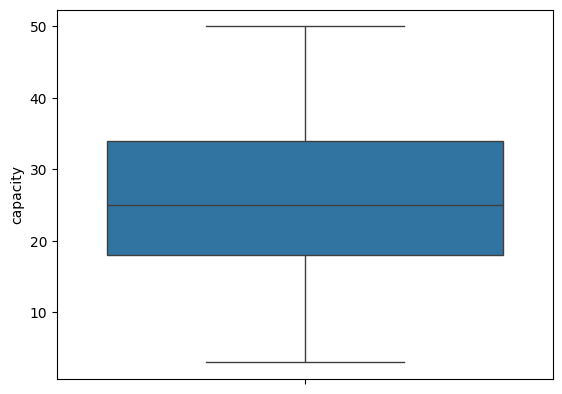

In [479]:
sns.boxplot(fact_agg_bookings['capacity'])

we don't have any outliers in capacity so we can use mean on it but you can use median also

In [480]:
fact_agg_bookings['capacity'].unique()

array([30., 19., 40., 26., nan, 34., 18., 31., 41., 32., 25., 15., 42.,
       33., 38., 27., 24., 36., 16., 23., 29., 50., 43., 22., 39., 44.,
       45., 21., 20.,  8.,  3.,  6.,  7., 10., 13.,  9., 17., 14.,  4.])

In [481]:
fact_agg_bookings['capacity'].mean()

np.float64(25.280495759947815)

In [482]:
fact_agg_bookings['capacity'].median()

np.float64(25.0)

In [483]:
fact_agg_bookings['capacity'] = fact_agg_bookings['capacity'].fillna(fact_agg_bookings['capacity'].median())
fact_agg_bookings.isna().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [484]:
fact_agg_bookings[fact_agg_bookings['successful_bookings'] > fact_agg_bookings['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [485]:
df_capacity_booking = fact_agg_bookings.copy()
df_capacity_booking['morethencapacity'] = df_capacity_booking.apply(lambda x: 'more' if x['successful_bookings'] > x['capacity'] else 'less',axis=1)
df_capacity_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,morethencapacity
0,16559,1-May-22,RT1,25,30.0,less
1,19562,1-May-22,RT1,28,30.0,less
2,19563,1-May-22,RT1,23,30.0,less
3,17558,1-May-22,RT1,30,19.0,more
4,16558,1-May-22,RT1,18,19.0,less


In [486]:
df_capacity_booking['morethencapacity'].value_counts()

morethencapacity
less    9194
more       6
Name: count, dtype: int64

Data Transformation

In [487]:
fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


there is a concept of ocupency percentage and it is calculated as successful_bookings/capacity

In [488]:
fact_agg_bookings['OCC'] = fact_agg_bookings.apply(lambda x : round((x['successful_bookings']/x['capacity'])*100,2),axis=1)
fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


Insight Generation

In [489]:
room_occ = fact_agg_bookings.groupby(by="room_category")['OCC'].mean().round(2)
room_occ

room_category
RT1    58.23
RT2    58.04
RT3    58.03
RT4    59.30
Name: OCC, dtype: float64

In [490]:
dim_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [491]:
df_room_agg = pd.merge(fact_agg_bookings,dim_rooms,left_on='room_category',right_on='room_id')
room_occ = df_room_agg.groupby(by="room_class")['OCC'].mean().round(2)
room_occ

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.23
Name: OCC, dtype: float64

<Axes: xlabel='room_class', ylabel='OCC'>

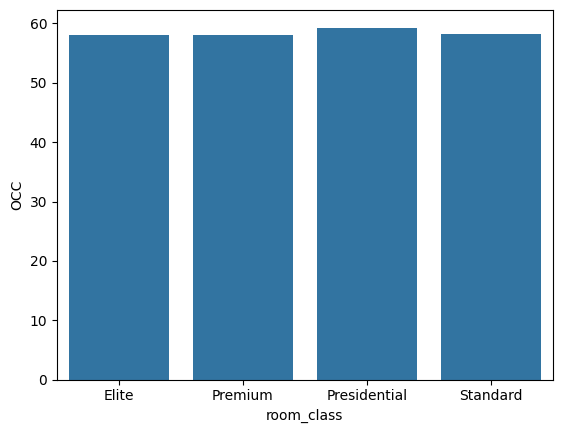

In [492]:
sns.barplot(room_occ)

In [493]:
# lets drop room id

df_room_agg.drop('room_id',inplace=True,axis=1)
df_room_agg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,Standard


In [494]:
# avg occ per city

dim_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [495]:
df_room_agg_hotels = pd.merge(df_room_agg,dim_hotels,on='property_id')
df_room_agg_hotels.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore
3,17558,1-May-22,RT1,30,19.0,157.89,Standard,Atliq Grands,Luxury,Mumbai
4,16558,1-May-22,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi


In [496]:
df_room_agg_hotels.groupby('city')['OCC'].mean().round(2)

city
Bangalore    56.59
Delhi        61.61
Hyderabad    58.14
Mumbai       57.94
Name: OCC, dtype: float64

In [497]:
dim_data

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [498]:
# OCC better in weekdays or weekends

df_add_date = pd.merge(df_room_agg_hotels,dim_data,left_on='check_in_date',right_on='date')
df_add_date.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [499]:
df_add_date.shape

(6500, 14)

In [500]:
df_add_date.drop('date',axis=1,inplace=True)

In [501]:
df_add_date.groupby('day_type')['OCC'].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: OCC, dtype: float64

In [502]:
# in june what is the occ for different city

In [503]:
df_room_agg_hotels.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore
3,17558,1-May-22,RT1,30,19.0,157.89,Standard,Atliq Grands,Luxury,Mumbai
4,16558,1-May-22,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi


In [504]:
df_add_date['month'] = df_add_date['mmm yy'].apply(lambda x:x.split(' ')[0])
df_add_date

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC,room_class,property_name,category,city,mmm yy,week no,day_type,month
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,May 22,W 20,weekeday,May
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,May 22,W 20,weekeday,May
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,May 22,W 20,weekeday,May
3,19563,10-May-22,RT1,16,30.0,53.33,Standard,Atliq Palace,Business,Bangalore,May 22,W 20,weekeday,May
4,17558,10-May-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Mumbai,May 22,W 20,weekeday,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential,Atliq Palace,Business,Delhi,Jul 22,W 32,weekend,Jul
6496,16559,31-Jul-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,Jul 22,W 32,weekend,Jul
6497,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Grands,Luxury,Mumbai,Jul 22,W 32,weekend,Jul
6498,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Palace,Business,Bangalore,Jul 22,W 32,weekend,Jul


In [505]:
df_add_date[df_add_date['month'] == 'Jun'].groupby('city')['OCC'].mean().round(2)

city
Bangalore    56.58
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Name: OCC, dtype: float64

In [506]:
df_add_date['month'].unique()

array(['May', 'Jun', 'Jul'], dtype=object)

In [507]:
# append a new data

new_aug_data

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [508]:
new_aug_data.rename(columns={"occ%":"OCC"},inplace=True)

In [509]:
new_aug_data['month'] = new_aug_data['mmm yy'].apply(lambda x:x.split(' ')[0])
new_aug_data

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,OCC,month
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00,Aug-22
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00,Aug-22
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67,Aug-22
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00,Aug-22
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92,Aug-22
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23,Aug-22
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50,Aug-22


In [510]:
df_add_date

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC,room_class,property_name,category,city,mmm yy,week no,day_type,month
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,May 22,W 20,weekeday,May
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,May 22,W 20,weekeday,May
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,May 22,W 20,weekeday,May
3,19563,10-May-22,RT1,16,30.0,53.33,Standard,Atliq Palace,Business,Bangalore,May 22,W 20,weekeday,May
4,17558,10-May-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Mumbai,May 22,W 20,weekeday,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential,Atliq Palace,Business,Delhi,Jul 22,W 32,weekend,Jul
6496,16559,31-Jul-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,Jul 22,W 32,weekend,Jul
6497,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Grands,Luxury,Mumbai,Jul 22,W 32,weekend,Jul
6498,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Palace,Business,Bangalore,Jul 22,W 32,weekend,Jul


In [511]:
df_append = pd.concat([df_add_date,new_aug_data])
df_append

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC,room_class,property_name,category,city,mmm yy,week no,day_type,month
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,May 22,W 20,weekeday,May
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,May 22,W 20,weekeday,May
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,May 22,W 20,weekeday,May
3,19563,10-May-22,RT1,16,30.0,53.33,Standard,Atliq Palace,Business,Bangalore,May 22,W 20,weekeday,May
4,17558,10-May-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Mumbai,May 22,W 20,weekeday,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,19563,01-Aug-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore,Aug-22,W 32,weekeday,Aug-22
3,19558,01-Aug-22,RT1,30,40.0,75.00,Standard,Atliq Grands,Luxury,Bangalore,Aug-22,W 32,weekeday,Aug-22
4,19560,01-Aug-22,RT1,20,26.0,76.92,Standard,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday,Aug-22
5,17561,01-Aug-22,RT1,18,26.0,69.23,Standard,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday,Aug-22


In [512]:
# revenew per city

fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [513]:
dim_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [514]:
df_hotels_booking = pd.merge(fact_bookings,dim_hotels,on='property_id')
df_hotels_booking.groupby('city')['revenue_generated'].sum()

city
Bangalore    494828175
Delhi        346417540
Hyderabad    381400850
Mumbai       784825740
Name: revenue_generated, dtype: int64

In [515]:
# month by month revenue

import datetime as dt

In [516]:
df_hotels_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
3,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
4,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [517]:
df_hotels_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134585 entries, 0 to 134584
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134585 non-null  object 
 1   property_id        134585 non-null  int64  
 2   booking_date       134585 non-null  object 
 3   check_in_date      134585 non-null  object 
 4   checkout_date      134585 non-null  object 
 5   no_guests          134582 non-null  float64
 6   room_category      134585 non-null  object 
 7   booking_platform   134585 non-null  object 
 8   ratings_given      56680 non-null   float64
 9   booking_status     134585 non-null  object 
 10  revenue_generated  134585 non-null  int64  
 11  revenue_realized   134585 non-null  int64  
 12  property_name      134585 non-null  object 
 13  category           134585 non-null  object 
 14  city               134585 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [518]:
dim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [536]:
df_hotels_booking['parsed_date'] = pd.to_datetime(df_hotels_booking['check_in_date'], format='mixed', errors='coerce')
dim_data['date'] = pd.to_datetime(dim_data['date'])

/var/folders/n6/28ff8fsj0c901jvkhvfb8ylw0000gn/T/ipykernel_1615/3562455442.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dim_data['date'] = pd.to_datetime(dim_data['date'])


In [537]:
df_hotels_booking

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,parsed_date
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-01-05
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-01-05
2,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-01-05
3,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-01-05
4,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134580,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,2022-07-31
134581,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,4.0,RT4,logtrip,2.0,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai,2022-07-31
134582,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai,2022-07-31
134583,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,2022-07-31


In [539]:
df_date_hotel_booking = pd.merge(df_hotels_booking,dim_data,left_on='parsed_date',right_on='date')
df_date_hotel_booking

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,parsed_date,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,5/5/2022,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,5/5/2022,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,5/5/2022,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,5/5/2022,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-05,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,5/5/2022,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-05,2022-05-05,May 22,W 19,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92575,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,2022-07-31,2022-07-31,Jul 22,W 32,weekend
92576,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,4.0,RT4,logtrip,2.0,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai,2022-07-31,2022-07-31,Jul 22,W 32,weekend
92577,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai,2022-07-31,2022-07-31,Jul 22,W 32,weekend
92578,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,2022-07-31,2022-07-31,Jul 22,W 32,weekend


In [540]:
df_date_hotel_booking['month'] = df_date_hotel_booking['mmm yy'].apply(lambda x: x.split(' ')[0])
df_date_hotel_booking

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,revenue_realized,property_name,category,city,parsed_date,date,mmm yy,week no,day_type,month
0,May052216558RT11,16558,15-04-22,5/5/2022,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,...,10010,Atliq Grands,Luxury,Delhi,2022-05-05,2022-05-05,May 22,W 19,weekeday,May
1,May052216558RT12,16558,30-04-22,5/5/2022,7/5/2022,2.0,RT1,others,NaN,Cancelled,...,3640,Atliq Grands,Luxury,Delhi,2022-05-05,2022-05-05,May 22,W 19,weekeday,May
2,May052216558RT13,16558,1/5/2022,5/5/2022,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,...,10010,Atliq Grands,Luxury,Delhi,2022-05-05,2022-05-05,May 22,W 19,weekeday,May
3,May052216558RT14,16558,3/5/2022,5/5/2022,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,...,9100,Atliq Grands,Luxury,Delhi,2022-05-05,2022-05-05,May 22,W 19,weekeday,May
4,May052216558RT15,16558,30-04-22,5/5/2022,10/5/2022,4.0,RT1,others,4.0,Checked Out,...,10920,Atliq Grands,Luxury,Delhi,2022-05-05,2022-05-05,May 22,W 19,weekeday,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92575,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,...,32300,Atliq Seasons,Business,Mumbai,2022-07-31,2022-07-31,Jul 22,W 32,weekend,Jul
92576,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,4.0,RT4,logtrip,2.0,Checked Out,...,38760,Atliq Seasons,Business,Mumbai,2022-07-31,2022-07-31,Jul 22,W 32,weekend,Jul
92577,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,...,12920,Atliq Seasons,Business,Mumbai,2022-07-31,2022-07-31,Jul 22,W 32,weekend,Jul
92578,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,...,32300,Atliq Seasons,Business,Mumbai,2022-07-31,2022-07-31,Jul 22,W 32,weekend,Jul


In [542]:
df_date_hotel_booking.groupby('month')['revenue_generated'].sum()

month
Jul    457882650
Jun    443905310
May    479275250
Name: revenue_generated, dtype: int64

In [543]:
# Revenue realized per hotal type
df_date_hotel_booking.groupby('category')['revenue_realized'].sum()


category
Business    452002975
Luxury      723557067
Name: revenue_realized, dtype: int64

In [545]:
# avg rating per city

df_date_hotel_booking.groupby('city')['ratings_given'].mean().round(2)

city
Bangalore    3.40
Delhi        3.78
Hyderabad    3.66
Mumbai       3.64
Name: ratings_given, dtype: float64

In [549]:
# Revenue realized per booking platform

group = df_date_hotel_booking.groupby('booking_platform')['revenue_realized'].sum()
group = pd.DataFrame(group)
group

,revenue_realized
booking_platform,
direct offline,59298844
direct online,117245053
journey,71231599
logtrip,129075081
makeyourtrip,233132708
others,480711744
tripster,84865013


<Axes: ylabel='revenue_realized'>

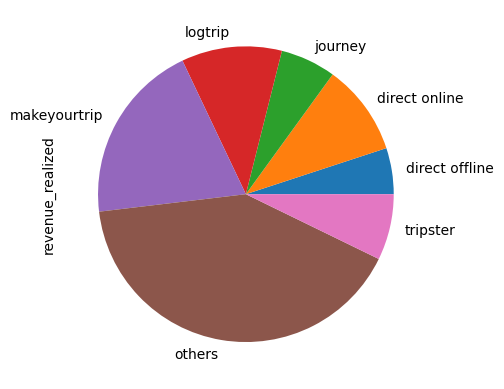

In [554]:
df_date_hotel_booking.groupby('booking_platform')['revenue_realized'].sum().plot(kind='pie')